In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 讀取 CSV
df = pd.read_excel("data_ema.xlsx", index_col="Date", parse_dates=True)
print(df.head())

                  Close         High          Low         Open       Volume
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Close']])

print(df_scaled[:5])

[[0.02203485]
 [0.01991275]
 [0.02346513]
 [0.02411522]
 [0.02412175]]


In [ ]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(df_scaled, time_steps)

print("X shape:", X.shape) 
print("y shape:", y.shape)

X shape: (1823, 60, 1)
y shape: (1823, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 建立 LSTM 模型
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# 編譯模型
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 切分訓練集和測試集
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0321 - val_loss: 0.0023
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7.9932e-04 - val_loss: 0.0016
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 8.2543e-04 - val_loss: 0.0020
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 8.5010e-04 - val_loss: 0.0011
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step

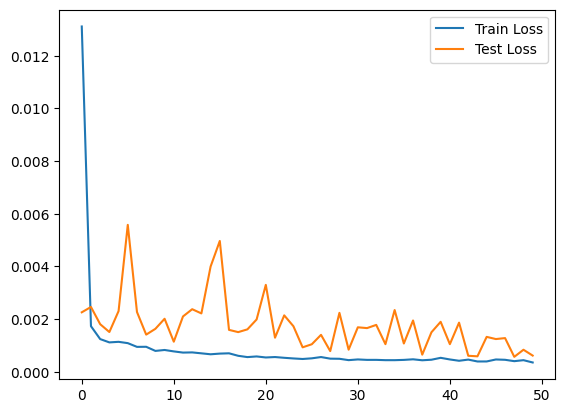

In [40]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


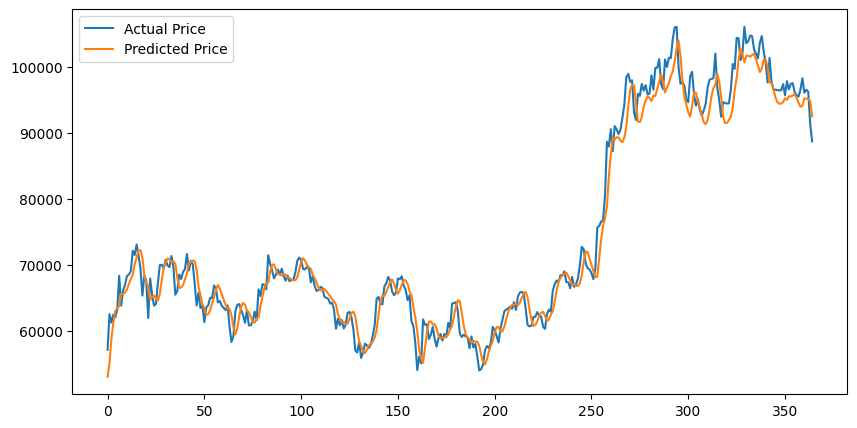

In [ ]:
# 預測測試集數據
y_pred = model.predict(X_test)

# 反向轉換回原始價格
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 畫出預測結果
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label="Actual Price")
plt.plot(y_pred_rescaled, label="Predicted Price")
plt.legend()
plt.show()